In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
L = 256
L1 = L - 1
img_in = plt.imread('dark_squares.png')
img0 = np.floor(img_in[:,:,1] * L1).astype(int)
# img0 = np.floor(np.sum(img_in[:,:,:3], axis=2)/3 * 256).astype(int)
M, N = img0.shape

In [3]:
def get_histogram(img):
    histogram = np.zeros(L, dtype=int)
    for val in img.flatten():
        histogram[val] += 1
    return histogram

In [4]:
def get_neighbourhood(img, i, j, r):
    i1, j1 = max(i-r, 0), max(j-r, 0)
    i2, j2 = min(i+r+1, M), min(j+r+1, N)
    return img[i1:i2, j1:j2]

In [5]:
def get_local_histogram(img, i, j, r):
    histogram = np.zeros(L, dtype=int)
    for val in get_neighbourhood(img, i, j, r).flatten():
        histogram[val] += 1
    return histogram

In [6]:
def plot_hist(hist):
    plt.bar(np.arange(0, L, dtype=int), hist)

In [7]:
def plot_img_hist(img):
    _, axarr = plt.subplots(1, 2, figsize=(8,4))
    axarr[0].imshow(img, cmap='grey', vmin=0, vmax=L)
    axarr[1].bar(np.arange(0, L, dtype=int), get_histogram(img))
    # axarr[1].hist(img.flatten(), np.arange(0, 256))

In [8]:
def cdf(hist):
    s = np.zeros(L, dtype=int)
    for r in range(1, L):
        s[r] = s[r-1] + hist[r]
    return np.floor(s * L1 / (M * N)).astype(int)
    

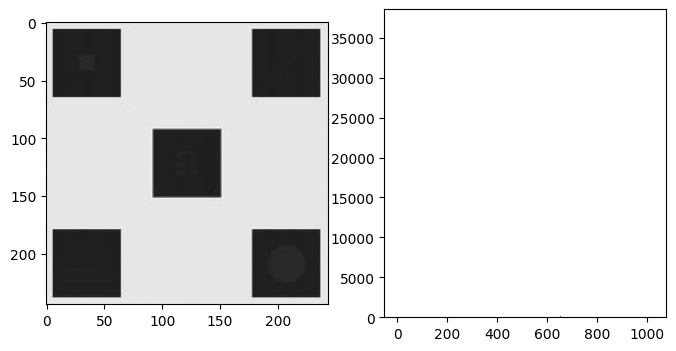

In [9]:
plot_img_hist(img0)

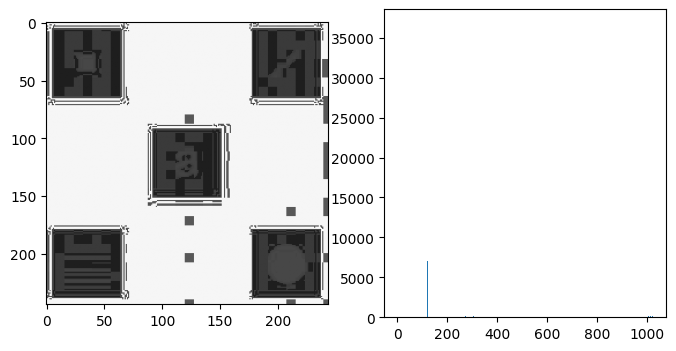

In [10]:
g = get_histogram(img0)
T = cdf(g)
img1 = np.vectorize(lambda r: T[r])(img0)
plot_img_hist(img1)

In [11]:
def cdf_xy(hist, val, radius):
    s = 0
    for r in range(val+1):
        s += hist[r]
    return np.floor(s * L1 / (2*radius+1)**2).astype(int)


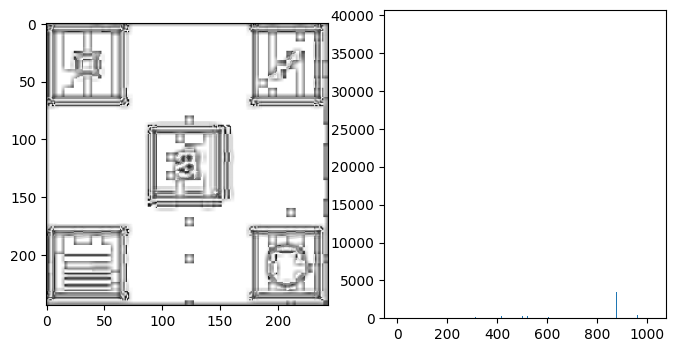

In [12]:
img2 = np.zeros((M, N), dtype=int)
radius = 3

for x in range(M):
    for y in range(N):
        gxy = get_local_histogram(img0, x, y, radius)
        img2[x, y] = cdf_xy(gxy, img0[x, y], radius)

plot_img_hist(img2)

In [13]:
M, N

(244, 244)